In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

In [0]:
from fastai import *
from fastai.vision import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
ls

ALL_IDB2.rar  alzhdset/  alzhdset.zip  DRIVE.zip  images/


In [7]:
cd drive/"My Drive"/datasets

/content/drive/My Drive/datasets


In [25]:
ls

ALL_IDB2.rar  alzhdset/  alzhdset.zip  DRIVE.zip  images/


In [0]:
path = "alzhdset/"
bs = 64
tfms = contrast(x=1.00)

In [0]:
np.random.seed(2)

In [48]:
data = ImageDataBunch.from_folder(path, train='Train', valid='Test', size=160, bs=bs)
data.normalize(imagenet_stats)

In [49]:
print(data.classes)
len(data.classes),data.c

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


(4, 4)

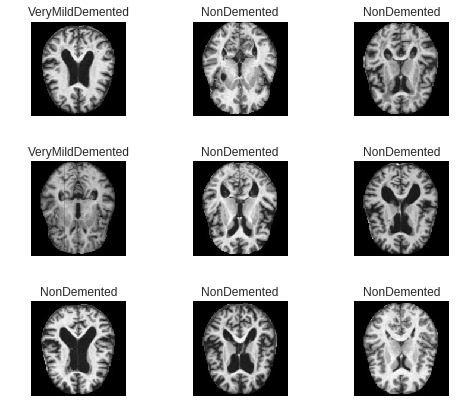

In [50]:
data.show_batch(rows=3, figsize=(7,6))

### ResNet 34

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [53]:
learn.fit_one_cycle(8)

Total time: 04:58
epoch  train_loss  valid_loss  accuracy
1      0.503767    0.909094    0.611415  (00:37)
2      0.444427    0.990761    0.623143  (00:37)
3      0.376668    1.056371    0.616106  (00:37)
4      0.274198    1.017792    0.667709  (00:37)
5      0.174275    1.145752    0.680219  (00:37)
6      0.112801    1.109076    0.684910  (00:37)
7      0.075088    1.148834    0.694292  (00:37)
8      0.052359    1.136085    0.690383  (00:36)



In [0]:
learn.save('resnet34')

In [0]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(10)

Total time: 06:40
epoch  train_loss  valid_loss  accuracy
1      0.021454    1.995235    0.683346  (00:40)
2      0.072192    2.009616    0.595778  (00:40)
3      0.103748    5.072022    0.511337  (00:39)
4      0.087938    1.719478    0.652072  (00:39)
5      0.058591    1.404937    0.678655  (00:40)
6      0.042578    0.757219    0.759969  (00:40)
7      0.020298    1.019235    0.741204  (00:39)
8      0.007972    1.011817    0.749023  (00:40)
9      0.003368    1.209249    0.739640  (00:39)
10     0.001742    1.088688    0.750586  (00:39)



In [0]:
learn.save('resnet34_unfreezed')

In [68]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


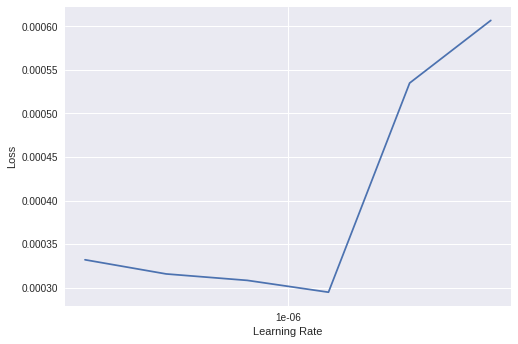

In [69]:
learn.recorder.plot()

In [71]:
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-5))

Total time: 05:24
epoch  train_loss  valid_loss  accuracy
1      0.000508    1.104867    0.746677  (00:40)
2      0.000894    1.174729    0.744332  (00:40)
3      0.001159    1.134416    0.747459  (00:40)
4      0.000719    1.069489    0.754496  (00:40)
5      0.000923    1.051323    0.755278  (00:40)
6      0.000731    1.129683    0.747459  (00:40)
7      0.000612    1.131153    0.750586  (00:40)
8      0.000514    1.065881    0.756841  (00:40)



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

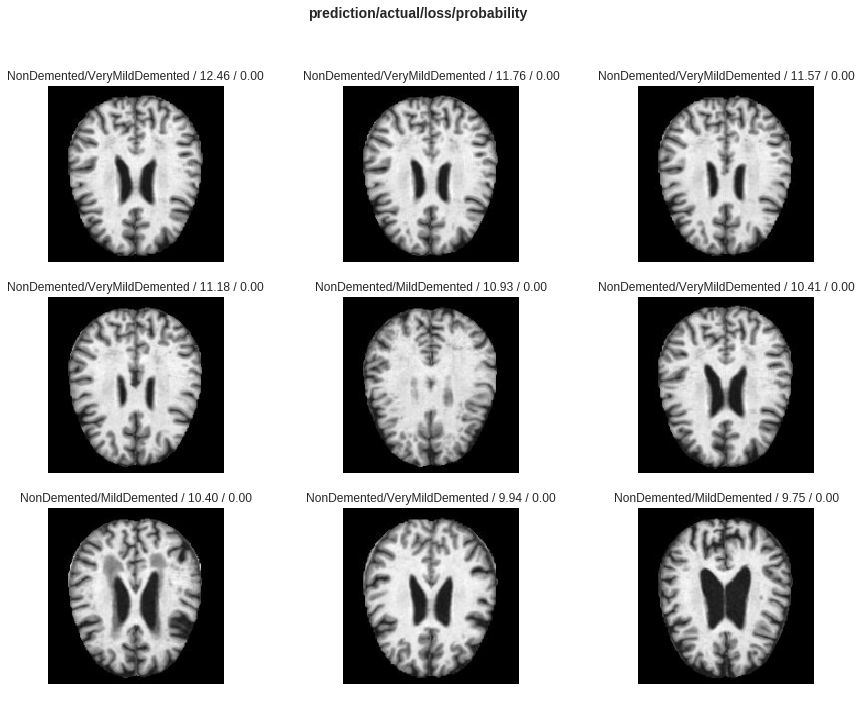

In [73]:
interp.plot_top_losses(9, figsize=(15,11))

In [74]:
interp.most_confused(min_val=2)

[('VeryMildDemented', 'NonDemented', 113),
 ('NonDemented', 'VeryMildDemented', 80),
 ('MildDemented', 'NonDemented', 55),
 ('MildDemented', 'VeryMildDemented', 49),
 ('VeryMildDemented', 'MildDemented', 7),
 ('NonDemented', 'MildDemented', 3)]

The model confuses between Non-demented and Mildly-demented which is legitimate I believe.

### ResNet 50

In [54]:
resnet_50 = create_cnn(data, models.resnet50, metrics=accuracy)

Total time: 06:51
epoch  train_loss  valid_loss  accuracy
1      1.228067    1.139417    0.555121  (00:58)
2      0.756109    1.024463    0.615324  (00:50)
3      0.494769    1.101852    0.612979  (00:50)
4      0.306039    1.310129    0.641126  (00:50)
5      0.164021    1.297827    0.657545  (00:50)
6      0.089320    1.164004    0.661454  (00:50)
7      0.044851    1.186793    0.666927  (00:50)
8      0.028107    1.174440    0.672400  (00:50)



In [55]:
resnet_50.fit_one_cycle(2)

Total time: 01:40
epoch  train_loss  valid_loss  accuracy
1      0.160908    1.657155    0.596560  (00:50)
2      0.138686    1.066051    0.663018  (00:50)



The performance of ResNet34 is better so we'll continue with it

### U-Net